![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **Lineare Regression Aufgaben**
    - **Aufgabe 1 - Imports**
    - **Aufgabe 2 - Daten verstehen**
    - **Aufgabe 3 - Daten in Pandas**
    - **Aufgabe 4 - Datenvisualisierung**
    - **Aufgabe 5 - Daten aufteilen**
    - **Aufgabe 6 - Modell trainieren**
    - **Aufgabe 6 - Modell testen**
    - **Aufgabe 7 - Model visualisieren**


# Lineare Regression Aufgaben

## Aufgabe 1 - Imports

- Importiere `numpy` und `pandas`.
- Importiere `seaborn` und `matplotlib.pyplot`.
- Importiere von `sklearn` das Module `datasets`
- Importiere aus dem Model `sklearn.linear_model` das Modell [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- Importiere aus dem Model `sklearn.model_selection` die Funktionen  [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) und [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- Importiere aus dem Model `sklearn.metrics` die Funktionen [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) und [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- Lies den Datensatz `diabetes` mit `datasets.load_diabetes()` ein.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

diabetes = datasets.load_diabetes()

## Aufgabe 2 - Daten verstehen

- Gib die Schlüssel des Datensatzes auf der Konsole aus.
- Gib die Beschreibung `DESCR` des Datensatzes auf der Konsole aus.
- Was sind die Daten und was ist der Target des Datensatzes?
- Gib das Shape des Datensatzes auf der Konsole aus.
- Gib die Features `feature_names` des Datensatzes auf der Konsole aus.

In [29]:
# Schreibe dein Code hier

print(diabetes.keys())

print(diabetes.DESCR)

print(diabetes.target)

## Die Daten sind die Daten der 442 Diabetes Patienten, deren physiologische und personelle Daten in 10 Variablen, sowie deren Krankheitsverläufe ein jahr nach der ersten Blutmessung und ihr "response of interest".
## Der Target des Datensatzes sind eben diese quantitativen Messungen des Krankheitsverlaufs ein Jahr nach der ersten Messung.

print(diabetes.data.shape) # 442 rows 10 columns

print(diabetes.feature_names) # ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - 

## Aufgabe 3 - Daten in Pandas

- Erstelle ein Data Frame `df`, mit den Daten `data` und den Spaltennamen `feature_names` aus dem Datensatz.
- Füge die Spalte `target` am Ende des DataFrames mit den Daten `target` aus dem Datensatz hinzu.

In [37]:
# Schreibe dein Code hier

df = pd.DataFrame(data     = diabetes.data,
                  columns  = diabetes.feature_names)
df['target'] = diabetes.target

df

# Schreibe dein Code hier

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
# Schreibe dein Code hier

# Schreibe dein Code hier

## Aufgabe 4 - Datenvisualisierung

- Erstelle ein `heatmap` mit Seaborn für die Korrelationswerte des Datensatzes. 
    - Benutze hierfür die Funktionen `heatmap` aus `seaborn` und 
    - `corr()` des Pandas-Dataframes
- Runde die Korrelationswerte auf 2 Nachkommastellen. Der Befehl `df.corr().round(2)` ist hier von Nutzen.
- Welches Feature hat die höchste positive oder negative Korrelation zum Target?

Wir entscheiden uns für das Feature mit der höchsten Korrelation und arbeiten jetzt nur mit diesem Feature.

- Speichere die Daten dieses Feature im Numpy Array `X_data`.
- Speichere die Daten des Targets im Numpy Array `y_data`.
- Erstelle ein `scatter`-Plot, in welchem die Punkte aus `X_data` gegen die Punkte aus `y_data` aufgetragen werden

> <span style="color:red"> **_WICHTIG:_** </span> Vergewissere dich (mittels `type`), dass `X_data` und `y_data` *wirklich* Numpy Arrays sind! Für die weiteren Zellen wollen wir *keine* Dataframes benutzen!

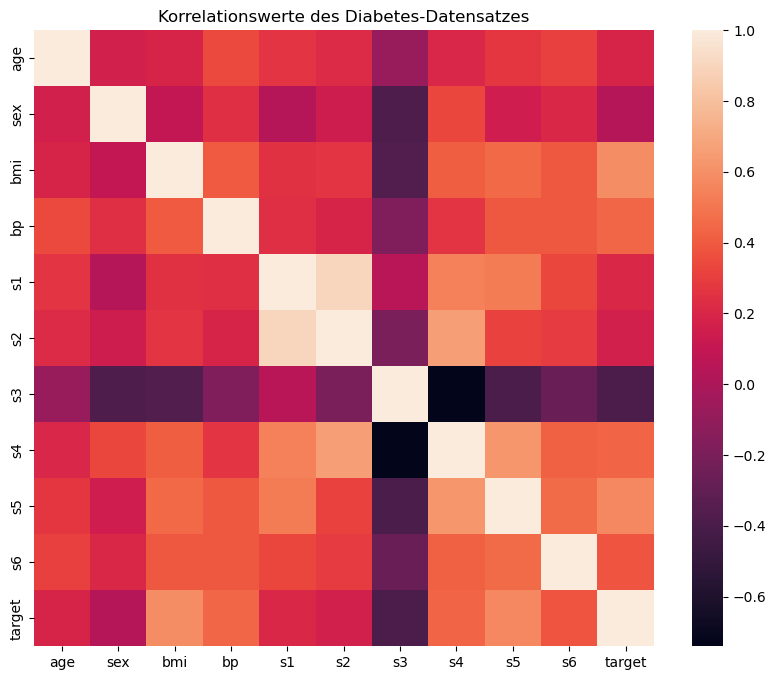

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='bmi', ylabel='target'>

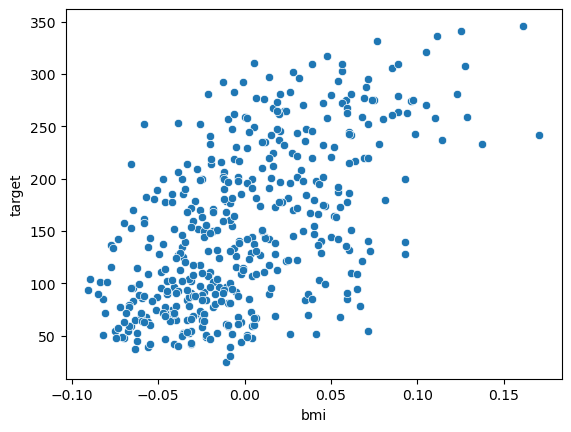

In [44]:
# Schreibe dein Code hier

correlation = df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation)
plt.title("Korrelationswerte des Diabetes-Datensatzes")
plt.show()

## Der BMI und der s5 haben recht gute positive Korrelationen, s3 und sex sind leicht negativ konnotiert.

X_data = np.array(df['bmi'].values)
y_data = np.array(df['target'].values)

sns.scatterplot(data=df, x='bmi',y='target')

# Schreibe dein Code hier

In [ ]:
# Schreibe dein Code hier

# Schreibe dein Code hier

## Aufgabe 5 - Daten aufteilen

- Gib die Shape von `X_data` und `y_data` auf der Konsole aus.
- Wandle die Arrays zu einem 2D Array mit shape `(442,1)`.
- Teile die Daten mit der Funktion `train_test_split` in `X_train, X_test, y_train, y_test` auf.
- Dabei sollen die Trainingsdaten 80% der urprünglichen Daten ausmachen. 
- Benutze den `random_state` von 20 bei der Aufteilung.
- Gib die Dimensionen für alle 6 Variablen auf der Konsole aus.

In [52]:
# Schreibe dein Code hier

print(X_data.shape)
print(y_data.shape)

X = X_data.reshape(442,1)
y = y_data.reshape(442,1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=20)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


# Schreibe dein Code hier

(442,)
(442,)
(442, 1)
(442, 1)
(353, 1)
(353, 1)
(89, 1)
(89, 1)


## Aufgabe 6 - Modell trainieren

- Erstelle ein Modell der Klasse `LinearRegression`.
- Trainiere das Modell anhand der Trainingsdaten `X_train` und `y_train`.

Jetzt wollen wir den RMSE und den R2 score für die Trainingsdaten finden, damit wir die als Baselinewerte für unser Modell nutzen. Mit anderen Worten, trainieren wir das Modell mit `X_train` und fragen dann genau diese Werte nach. 
- Nutze die Methode `predict` des Regressionsmodells auf die Trainingsdaten `X_train` und speichere die ausgegebene Labels in `y_pred_train`.
- Berechne die **Wurzel** des MSE zwischen den wahren Labels `y_train` und den vorhergesagten aus `predict` und speichere das Ergebnis in der Variable `rmse`.
- Berechne den R2 Score zwischen den wahren Labels `y_train` und den vorhergesagten aus `predict`.

In [57]:
# Schreibe dein Code hier

lr = LinearRegression()

lr.fit(X_train, y_train)


y_pred_train = lr.predict(X_train)

mse = mean_squared_error(y_train,y_pred_train)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_train, y_pred_train)
print(f"R2 Score: {r2}")

# Schreibe dein Code hier

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Root Mean Squared Error (RMSE): 60.90116165729829
R2 Score: 0.3705235604984751
The model performance for training set
--------------------------------------
RMSE is 60.90116165729829
R2 score is 0.3705235604984751




## Aufgabe 6 - Modell testen



Jetzt wollen wir, wie in einem realistischen ML Ansatz, für Testdaten, die das trainierte Modells nie gesehen hat, Labels generieren.  
- Nutze `predict` für die Testdaten `X_test` und speichere die Labels in `y_pred_test`.
- Berechne die **Wurzel** des MSE zwischen den wahren Labels `y_test`und den vorhergesagten `y_pred_test` und speichere das Ergebnis in der Variable `rmse`.
- Berechne den R2 Score zwischen den wahren Labels `y_test` und den vorhergesagten aus `predict`.


In [58]:
# Schreibe dein Code hier

y_pred_test = lr.predict(X_test)

# Berechne die Wurzel des MSE
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse_test}")

# Berechne den R2-Score
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 Score: {r2_test}")



# Schreibe dein Code hier

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Root Mean Squared Error (RMSE): 60.90116165729829
R2 Score: 0.21847731902398215
The model performance for test set
--------------------------------------
RMSE is 60.90116165729829
R2 score is 0.3705235604984751




## Aufgabe 7 - Model visualisieren

- Erstelle ein `scatter` Plot blauen Punkte für `X_train` und `y_train`.
- Erstelle ein `scatter` Plot mit grünen Punkte für `X_test` und `y_test`.
- Plotte dazu noch die rote Regressionsgerade für `X_test` und `y_pred_test`. 

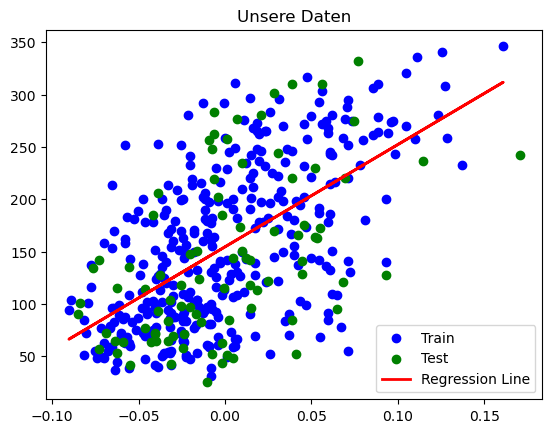

In [61]:
# Schreibe dein Code hier


plt.title("Unsere Daten")
plt.scatter(X_train,y_train, c='b', label=f'Train')

plt.scatter(X_test,y_test, c='g', label=f'Test')

plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression Line')
plt.legend()

# Plotten der Testdatenpunkte

# Schreibe dein Code hier